## Democracy
### Freedom in the World

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

This is a time series dataset. It contains no missing values.

In [2]:
freedom_df = pd.read_csv('../datasets/processed/democracy/freedom-world/freedom-world.csv', header=0)
print(f"Records: {len(freedom_df)}")

print(freedom_df.info())

freedom_df.describe()


Records: 2535
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    2535 non-null   object
 1   year       2535 non-null   int64 
 2   status     2535 non-null   object
 3   pr_rating  2535 non-null   int64 
 4   cl_rating  2535 non-null   int64 
 5   a1         2535 non-null   int64 
 6   a2         2535 non-null   int64 
 7   a3         2535 non-null   int64 
 8   a          2535 non-null   int64 
 9   b1         2535 non-null   int64 
 10  b2         2535 non-null   int64 
 11  b3         2535 non-null   int64 
 12  b4         2535 non-null   int64 
 13  b          2535 non-null   int64 
 14  c1         2535 non-null   int64 
 15  c2         2535 non-null   int64 
 16  c3         2535 non-null   int64 
 17  c          2535 non-null   int64 
 18  pr         2535 non-null   int64 
 19  d1         2535 non-null   int64 
 20  d2         2535 

,year,pr_rating,cl_rating,a1,a2,a3,a,b1,b2,b3,...,f3,f4,f,g1,g2,g3,g4,g,cl,total
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,...,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,2019.000000,3.479290,3.365680,2.474162,2.595266,2.443787,7.513215,2.664694,2.524655,2.325049,...,2.072189,1.887179,8.065878,2.705325,2.424063,2.322682,2.052071,9.504142,35.771992,59.276529
std,3.742396,2.202877,1.920481,1.610450,1.512477,1.426403,4.423216,1.398357,1.576291,1.433085,...,1.372550,1.079648,4.886316,1.239459,1.091535,1.059785,1.048757,4.144095,16.983931,30.063463
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
25%,2016.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000,1.000000,6.000000,22.000000,32.000000
50%,2019.000000,3.000000,3.000000,3.000000,3.000000,3.000000,9.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,8.000000,3.000000,2.000000,2.000000,2.000000,10.000000,37.000000,64.000000
75%,2022.000000,6.000000,5.000000,4.000000,4.000000,4.000000,12.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,13.000000,4.000000,3.000000,3.000000,3.000000,13.000000,52.000000,89.000000
max,2025.000000,7.000000,7.000000,4.000000,4.000000,4.000000,12.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,16.000000,4.000000,4.000000,4.000000,4.000000,16.000000,60.000000,100.000000


I'll take out country, and year as they are not predictors.
I'll take out pr_rating, cl_rating, total, and status as they are composite indexes.
a,b,c,d,e,f,g are aggregated scores but I'll keep them as they could add value to the PCA.

In [3]:
predictors = ['a','a1','a2','a3','b','b1','b2','b3','b4','c','c1','c2','c3','d','d1','d2','d3','d4','e','e1','e2','e3','f','f1','f2','f3','f4','g','g1','g2','g3','g4']
freedom_df_components = freedom_df[predictors]
freedom_df_components.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       2535 non-null   int64
 1   a1      2535 non-null   int64
 2   a2      2535 non-null   int64
 3   a3      2535 non-null   int64
 4   b       2535 non-null   int64
 5   b1      2535 non-null   int64
 6   b2      2535 non-null   int64
 7   b3      2535 non-null   int64
 8   b4      2535 non-null   int64
 9   c       2535 non-null   int64
 10  c1      2535 non-null   int64
 11  c2      2535 non-null   int64
 12  c3      2535 non-null   int64
 13  d       2535 non-null   int64
 14  d1      2535 non-null   int64
 15  d2      2535 non-null   int64
 16  d3      2535 non-null   int64
 17  d4      2535 non-null   int64
 18  e       2535 non-null   int64
 19  e1      2535 non-null   int64
 20  e2      2535 non-null   int64
 21  e3      2535 non-null   int64
 22  f       2535 non-null   int64
 23  f1      2535 

Text(0, 0.5, 'PC2')

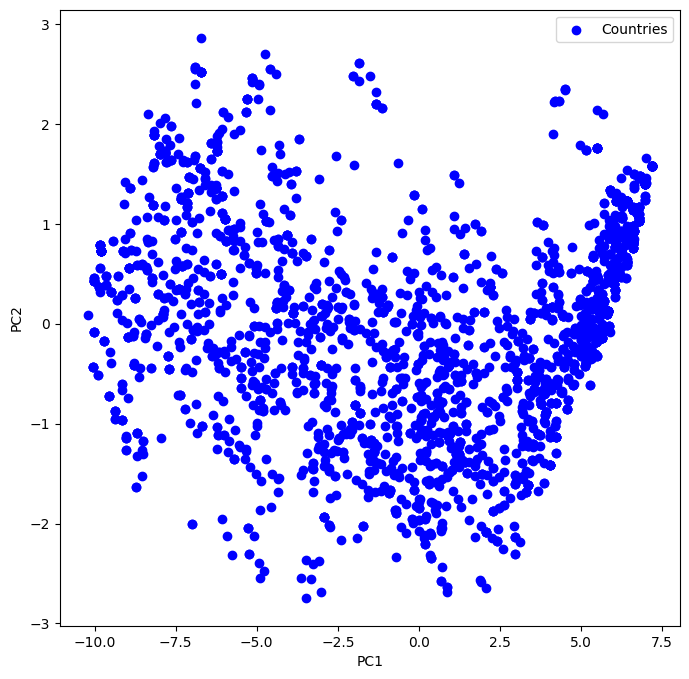

In [4]:
scaler = StandardScaler()
freedom_df_scaled = scaler.fit_transform(freedom_df_components)
freedom_df_scaled = pd.DataFrame(
    freedom_df_scaled,
    index=freedom_df_components.index,
    columns=freedom_df_components.columns
)
freedom_df_scaled.describe()

pca = PCA()
pca.fit(freedom_df_scaled)
scores = pca.transform(freedom_df_scaled)
scores.shape

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1], color='blue', label='Countries')
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Plotting the PCA with only two components demonstrated high variance.

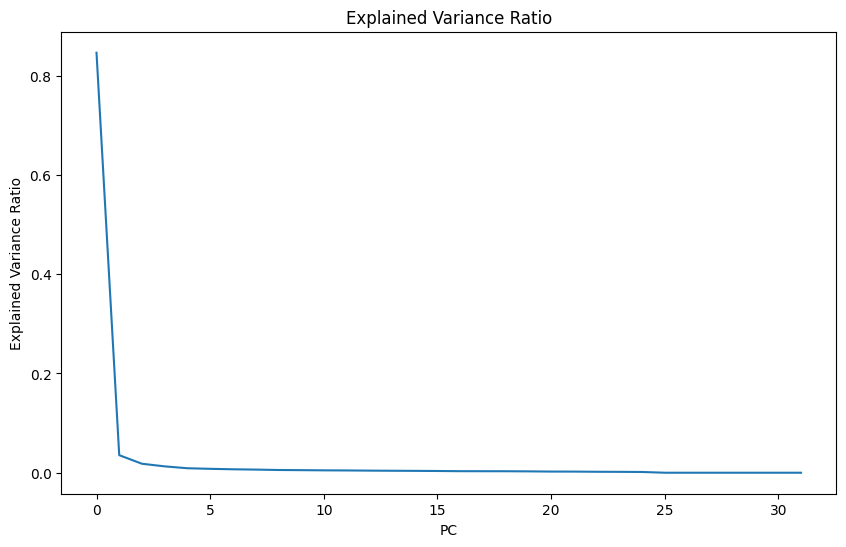

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.show()

The first principal component explains around 90% of the variance. I'll analyze the loadings of the first principal component to understand which predictors are more important to understand the difference between the countries.

In [6]:
# Print the loadings of the first principal component associated with the predictors
loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[0]
    }
).sort_values(by='Loading', ascending=False)

print("First Principal Component Loadings:")
print(loadings)

First Principal Component Loadings:
   Predictor   Loading
4          b  0.187139
18         e  0.186597
9          c  0.185512
22         f  0.184537
13         d  0.184101
0          a  0.183162
7         b3  0.182070
27         g  0.181941
10        c1  0.181644
20        e2  0.180996
19        e1  0.180735
3         a3  0.179363
5         b1  0.178526
2         a2  0.178437
14        d1  0.178327
6         b2  0.177277
28        g1  0.177141
1         a1  0.176622
23        f1  0.175775
12        c3  0.175484
17        d4  0.174903
8         b4  0.174473
16        d3  0.174042
25        f3  0.173934
26        f4  0.173832
21        e3  0.173556
29        g2  0.173309
24        f2  0.172692
31        g4  0.169588
11        c2  0.162799
30        g3  0.157950
15        d2  0.155623


I'll do the same analysis but only taking a snapshot of the dataset for the year with most complete data.

Now I'll select a year from the Time Series

In [7]:
# Show the number of records for each year and order in descending order
freedom_df['year'].value_counts().sort_values(ascending=False)

year
2025    195
2024    195
2023    195
2022    195
2021    195
2020    195
2019    195
2018    195
2017    195
2016    195
2015    195
2014    195
2013    195
Name: count, dtype: int64

I'll select the year 2025 as the latest and more complete snapshot of the dataset and calculate the PCA for this year.

Text(0, 0.5, 'PC2')

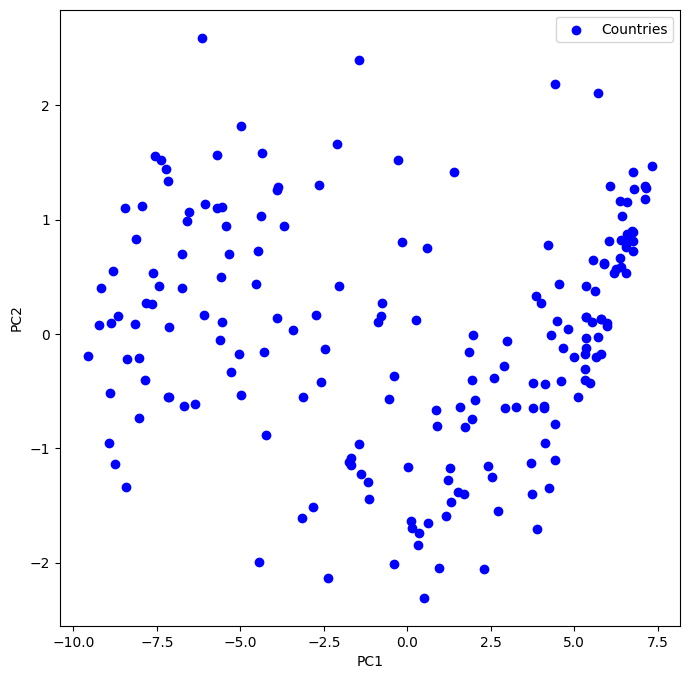

In [8]:
freedom_df_snapshot = freedom_df[freedom_df['year'] == 2025]
freedom_df_snapshot.head()
freedom_df_components = freedom_df_snapshot[predictors]
scaler = StandardScaler()
freedom_df_scaled = scaler.fit_transform(freedom_df_components)
freedom_df_scaled = pd.DataFrame(
    freedom_df_scaled,
    index=freedom_df_components.index,
    columns=freedom_df_components.columns
)
freedom_df_scaled.describe()

pca = PCA()
pca.fit(freedom_df_scaled)
scores = pca.transform(freedom_df_scaled)
scores.shape

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1], color='blue', label='Countries')
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

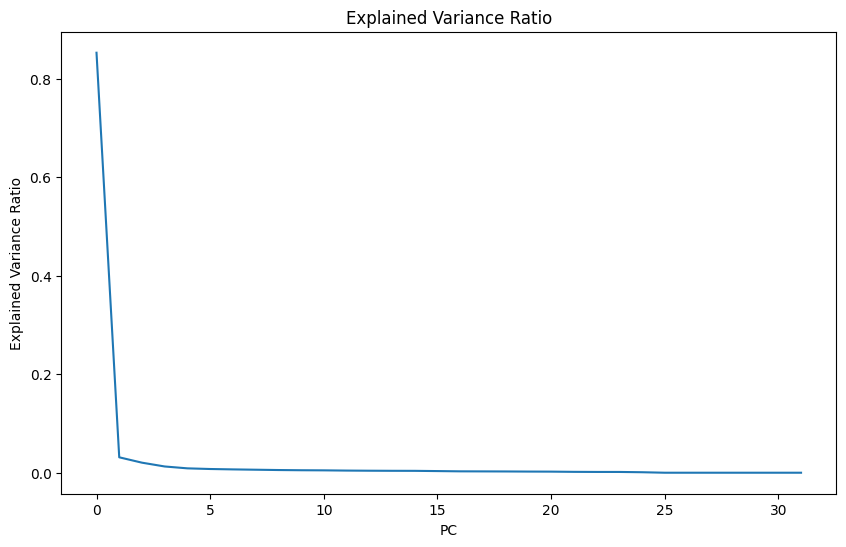

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [10]:
loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[0]
    }
).sort_values(by='Loading', ascending=False)

print("First Principal Component Loadings:")
print(loadings)

First Principal Component Loadings:
   Predictor   Loading
4          b  0.187102
9          c  0.185614
18         e  0.185538
22         f  0.184806
13         d  0.183406
0          a  0.182748
27         g  0.182101
20        e2  0.181593
10        c1  0.181537
7         b3  0.181405
2         a2  0.179315
3         a3  0.179064
19        e1  0.178622
6         b2  0.178121
5         b1  0.178092
17        d4  0.177754
14        d1  0.176950
1         a1  0.176528
8         b4  0.176497
12        c3  0.176244
28        g1  0.175916
23        f1  0.175834
24        f2  0.174608
16        d3  0.173399
29        g2  0.173153
26        f4  0.172761
25        f3  0.171721
21        e3  0.171504
31        g4  0.171039
11        c2  0.163050
30        g3  0.161873
15        d2  0.154550


From this I understand that all predictors add similar variance to the dataset but the aggregated values: a, b, c, d, e, f, g, add more important to differentiate the countries.

I'll create a correlation matrix to understand the correlation between the aggregated values.

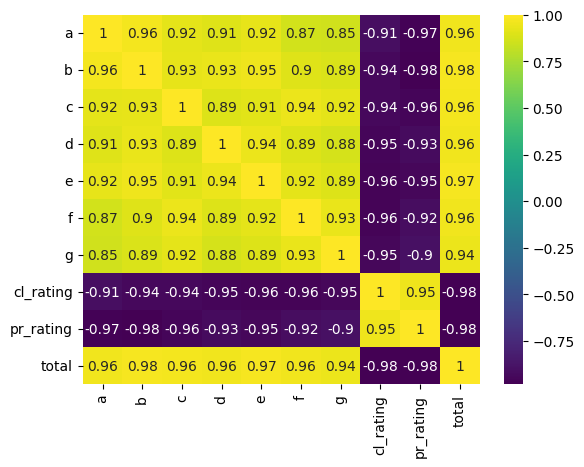

In [11]:
# Use the original dataset with the time series data and only the aggregated values
freedom_df_components = freedom_df[['a','b','c','d','e','f','g','cl_rating','pr_rating','total']]
sns.heatmap(freedom_df_components.corr(), cmap="viridis", annot = True)
plt.show()

There is a very high correlation between all the categories (a,b,c,d,e,f,g). This means that a high score in one of them would mean a high score in all of them.

When comparing this dataset with other indexes, it will be enough if we compare only the total score or aggregated values, as other predictors won't add much value to the correlation.

I'm generating a tabular dataset from the Year 2025 snapshot.

In [12]:
freedom_df_snapshot.drop(columns=['year'], inplace=True)
freedom_df_snapshot.to_csv('../datasets/processed/democracy/freedom-world/freedom-world-snapshot.csv', index=False)

/var/folders/3c/bf3091xd4h9fj5rvqhp6_05r0000gq/T/ipykernel_27020/2014183342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freedom_df_snapshot.drop(columns=['year'], inplace=True)
